In [1]:
#Routine Stuff
import numpy as np
import pandas as pd
from string import punctuation
import os
import operator
import matplotlib.pyplot as plt

In [2]:
#List of stop_words
f = open("StopWords.txt","r")
stop_words = []
for word in f.read().split():
    stop_words.append(word)
stop_words

["'ll",
 "'ve",
 '1-1',
 'a',
 "a's",
 'able',
 'about',
 'above',
 'abroad',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'added',
 'adj',
 'adopted',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'again',
 'against',
 'ago',
 'ah',
 'ahead',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'alongside',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amid',
 'amidst',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'apparently',
 'appear',
 'appreciate',
 'appropriate',
 'approximately',
 'are',
 'area',
 'areas',
 'aren',
 "aren't",
 'arent',
 'arise',
 'around',
 'as',
 'aside',
 'ask',
 'asked',
 'asking',
 'asks',
 'associated',
 'at',
 'auth',
 'available',
 'away',
 'awfully',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'backward',
 'bac

In [3]:
#other words to ignore
ignore_words = ["xyz", " ", "subject", "lines", "newsgroups", "path", "message-id", "organization"]

In [6]:
dic = {}
tempPath = "D:/Python Coding Ninjas/Text Classification Project/20_newsgroups/"
os.chdir(tempPath) #change path to tempPath
countDir = 0
totalDir = len(os.listdir(os.getcwd()))
for directory in os.listdir(os.getcwd()): #iterate through each class directory
    if directory[0]=='.': #ignoring the directory with a '.' at their beginning (mac issues I guess)
        continue
    path = tempPath + "/" + directory
    os.chdir(path) #change path to the next (or new) class directory
    files = os.listdir(os.getcwd()) #list of files in directory

    n = len(files)
    t = int(n*0.8) #number of training documents
    files = files[:t]
    
    count = 0
    print(t, "files to process in", directory)

    for file in files: #iterate through each file in the class directory
        f = open(file,"r",errors="ignore")
        for word in f.read().split():
            word = word.strip(punctuation).lower()
            if word not in stop_words and word not in ignore_words:# and word.isalpha() and len(word)!=1:
                #add/update frequency of each word that is not part of stop_words or ignore_words to the dictionary
                if word in dic:
                    dic[word] = dic[word] + 1
                else:
                    dic[word] = 1
        count += 1
        if count%100 == 0:
            print("Done with files: ", count)
    countDir += 1
    print("Done with directory: ", directory)
    print("Number: ", countDir, "of", totalDir)
    print()

800 files to process in alt.atheism
Done with files:  100
Done with files:  200
Done with files:  300
Done with files:  400
Done with files:  500
Done with files:  600
Done with files:  700
Done with files:  800
Done with directory:  alt.atheism
Number:  1 of 20

800 files to process in comp.graphics
Done with files:  100
Done with files:  200
Done with files:  300
Done with files:  400
Done with files:  500
Done with files:  600
Done with files:  700
Done with files:  800
Done with directory:  comp.graphics
Number:  2 of 20

800 files to process in comp.os.ms-windows.misc
Done with files:  100
Done with files:  200
Done with files:  300
Done with files:  400
Done with files:  500
Done with files:  600
Done with files:  700
Done with files:  800
Done with directory:  comp.os.ms-windows.misc
Number:  3 of 20

800 files to process in comp.sys.ibm.pc.hardware
Done with files:  100
Done with files:  200
Done with files:  300
Done with files:  400
Done with files:  500
Done with files:  600

In [7]:
dicbak = dic

In [8]:
dic = dicbak

In [9]:
len(dic)

224605

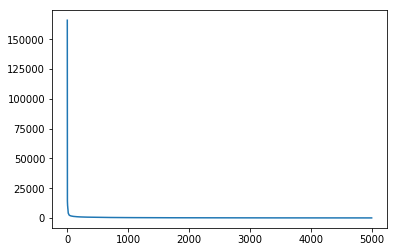

In [10]:
K = 5000 #limit the vocab list
#sort the dict according to frequency
sorted_dic = sorted(dic.items(), key=operator.itemgetter(1), reverse=True)
sorted_dic = sorted_dic[:K]
sorted_dic_name = [elem[0] for elem in sorted_dic]
sorted_dic_freq = [elem[1] for elem in sorted_dic]
sorted_dic = [list(elem) for elem in sorted_dic]
plt.plot(sorted_dic_freq)
plt.show()

In [11]:
sorted_dic

[['', 166054],
 ['apr', 16364],
 ['gmt', 14270],
 ['1993', 11841],
 ['writes', 11704],
 ['references', 10357],
 ['article', 10039],
 ['sender', 8773],
 ['people', 8454],
 ['university', 7919],
 ['1', 7707],
 ['nntp-posting-host', 6893],
 ['93', 6799],
 ['2', 6045],
 ['xref', 4697],
 ['cantaloupe.srv.cs.cmu.edu', 4685],
 ['news', 3939],
 ['0', 3922],
 ['distribution', 3832],
 ['3', 3759],
 ['god', 3630],
 ['20', 3417],
 ['6', 3242],
 ['5', 3215],
 ['4', 3136],
 ['16', 3100],
 ['15', 2928],
 ['21', 2787],
 ['government', 2610],
 ['question', 2602],
 ['file', 2577],
 ['reply-to', 2456],
 ['read', 2398],
 ['windows', 2387],
 ['usenet', 2321],
 ['usa', 2300],
 ['data', 2264],
 ['david', 2256],
 ['program', 2223],
 ['space', 2145],
 ['10', 2134],
 ['drive', 2095],
 ['science', 2089],
 ['software', 2073],
 ['version', 2057],
 ['law', 2016],
 ['tue', 1993],
 ['power', 1983],
 ['19', 1967],
 ['8', 1925],
 ['john', 1916],
 ['true', 1908],
 ['23', 1908],
 ['day', 1906],
 ['set', 1848],
 ['fri', 1

In [12]:
data = np.array([np.array(xi) for xi in sorted_dic])
data

array([['', '166054'],
       ['apr', '16364'],
       ['gmt', '14270'],
       ..., 
       ['refugees', '64'],
       ['aclu', '64'],
       ['karina', '64']], 
      dtype='<U155')

In [13]:
df = pd.DataFrame(data[1:])
df

,0,1
0,apr,16364
1,gmt,14270
2,1993,11841
3,writes,11704
4,references,10357
5,article,10039
6,sender,8773
7,people,8454
8,university,7919
9,1,7707


In [16]:
#save vocab to a file
os.chdir("D:/Python Coding Ninjas/Text Classification Project/")
df.to_csv("vocab.csv")